In [13]:
#!/usr/bin/python
import numpy as np
import matplotlib.pyplot as plt

compute $\theta$ and $\sigma$ for $f(x | \theta)$ in sampling

In [14]:
def sampling(samples):
    current_mean = np.mean(samples)
    current_var = np.var(samples)
    current_sigma = np.sqrt(current_var)
    np.nan_to_num(current_mean)
    np.nan_to_num(current_sigma)
    return current_mean, current_sigma

compute for prior

In [15]:
def posterior(mu, sigma, tau, x):
    np.nan_to_num(mu)
    np.nan_to_num(tau)
    div1 = pow(sigma, 2) * mu + x * pow(tau, 2)
    div2 = pow(sigma, 2) + pow(tau, 2)
    A = div1 / div2
    div3 = pow(sigma, 2) * pow(tau, 2)
    div4 = pow(sigma, 2) + pow(tau, 2)
    B = div3 / div4
    # print(div1, div2, div3, div4)
    B = np.sqrt(B)
    np.nan_to_num(A)
    np.nan_to_num(B)
    return A, np.sqrt(B)

compute MAP using conjugate prior

In [16]:
def MAP(filepath, param1, param2):
    mu = param1
    tau = param2
    data = np.loadtxt(filepath, dtype = float, delimiter = '\n')
    res = np.empty([data.size, 2], dtype = float)
    for i in range(len(data)):
        x = data[i]
        samples = data[np.arange(0, i)]
        theta, sigma = sampling(samples)
        if (i > 1):
            A, B = posterior(mu, sigma, tau, x)
            print(A, B)
            res[i][0] = A
            res[i][1] = B
            mu = A
            tau = B
    return res

In [17]:
MAP("uebl12_A2_data.txt", 0, 10)

C:\Users\simps\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\simps\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\simps\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\simps\anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\simps\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


31.45660771686639 2.5097537605399105
32.73024849467635 1.5370278217097153
33.75582373189317 1.2290842916115365
33.94472459060732 1.102896415755221
34.16379574001096 1.0461292308323882
34.305332438700674 1.0187865025934244
34.852672680186956 1.0055569555391868
35.00850018888657 1.0002819972125487
35.171080061766816 0.9974246300273812
35.41192200999307 0.9957679594221095
35.35640477108523 0.9947178345456525
35.44424846430666 0.9950236260869425
35.38641597823265 0.995062422739565
35.66991389084482 0.9955037787506272
35.839283761568694 0.9959922952533565
35.89480245011268 0.9961896344992146
36.01445809160254 0.9962251653876009
35.88812593140071 0.9961407468364869
35.95981620262151 0.996562896883057
36.08932039612524 0.9966986141124726
36.03200913028204 0.9967163080197154
36.03053778130521 0.9968614752764546
35.94156568135018 0.9969298140142168
35.96242820558993 0.9971325096518744
35.974271527856175 0.9971942765148423
36.084123912692085 0.9971932255989354
36.11668427374305 0.997165597678862

array([[1.42915001e-311, 1.42915050e-311],
       [6.92182007e+001, 0.00000000e+000],
       [3.14566077e+001, 2.50975376e+000],
       ...,
       [4.17962883e+001, 9.97209442e-001],
       [4.18480645e+001, 9.97208144e-001],
       [4.18302577e+001, 9.97206782e-001]])

plot $A$ against $\sqrt{B}$ against the number of iterations

31.45660771686639 2.5097537605399105
32.73024849467635 1.5370278217097153
33.75582373189317 1.2290842916115365
33.94472459060732 1.102896415755221
34.16379574001096 1.0461292308323882
34.305332438700674 1.0187865025934244
34.852672680186956 1.0055569555391868
35.00850018888657 1.0002819972125487
35.171080061766816 0.9974246300273812
35.41192200999307 0.9957679594221095
35.35640477108523 0.9947178345456525
35.44424846430666 0.9950236260869425
35.38641597823265 0.995062422739565
35.66991389084482 0.9955037787506272
35.839283761568694 0.9959922952533565
35.89480245011268 0.9961896344992146
36.01445809160254 0.9962251653876009
35.88812593140071 0.9961407468364869
35.95981620262151 0.996562896883057
36.08932039612524 0.9966986141124726
36.03200913028204 0.9967163080197154
36.03053778130521 0.9968614752764546
35.94156568135018 0.9969298140142168
35.96242820558993 0.9971325096518744
35.974271527856175 0.9971942765148423
36.084123912692085 0.9971932255989354
36.11668427374305 0.997165597678862

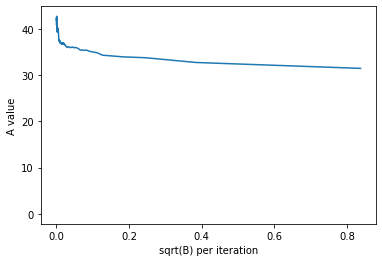

In [18]:
result = MAP("uebl12_A2_data.txt", 0, 10)

plot_data = np.empty([1000, 2], dtype = float)
for i in range(len(result)):
    plot_data[i][0] = result[i][0]
    plot_data[i][1] = result[i][1] / (i + 1)
plt.plot(plot_data[:, 1], plot_data[:, 0])
plt.xlabel("sqrt(B) per iteration")
plt.ylabel("A value")
plt.show()